In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [45]:
f0 = 26.7                         # Central requency of the burst, MHz
dt = 0.1                          # Temporal resolution, seconds
df = 39063                        # Spectral resolution, Hz
Aeff0 = 250                       # Average effective area, m2
dB_above_bg = 20                  # Burst intensity in dB above background

c = 299792458                     # Speed of light, m/s
kB = 1.38064852 * pow(10,-23)     # Boltzmann constant, W * m-2 * Hz-1 * sr-1

In [46]:
Tbg_Krymkin = 3.78*pow(10,5) * pow((10/f0), 2.56)         # Calculating the background temperature
SNR = pow(10, dB_above_bg/10)                             # Converting dB to times

$$
S = \frac{T_A + T_N}{T_A} \cdot \frac{2 k_B T_{\text{bg}}}{A_{\text{eff}} \sqrt{\Delta t \cdot \Delta f}} \cdot SNR
$$

For GURT subarray:
$$
\frac{T_A + T_N}{T_A} = 10
$$

In [47]:
S = 10 * Tbg_Krymkin * 2 * kB * SNR * pow(10, 22) / (Aeff0 * pow(dt *df , 0.5)) 

print('\n  Burst frequency:                            ', f0, ' MHz')
print('\n  Background temperature (Krymkin model):     ', np.round(Tbg_Krymkin, 3), ' K')
print('\n  Burst flux:                                 ', np.round(S, 3), ' s.f.u')
print('\n\n')


  Burst frequency:                             26.7  MHz

  Background temperature (Krymkin model):      30593.064  K

  Burst flux:                                  540.646  s.f.u





In [58]:
freq = np.linspace(1, 100, 1000, 0.1)

Igal = 2.48*pow(10,-20)*pow(freq,-0.52)*(1-np.exp(-5*pow(freq,-2.1)))/(5*pow(freq,-2.1))
Iexgal = 1.06*pow(10,-20)*pow(freq,-0.8)*np.exp(-5*pow(freq,-2.1))
Tbg_Cane = (Iexgal + Igal) * pow(c, 2) / (2 * pow(freq*1000000, 2) * kB)
Tbg_Krymkin = 3.78*pow(10,5) * pow((10/freq), 2.56)

(7.0, 85.0, 1000.0, 400000.0)

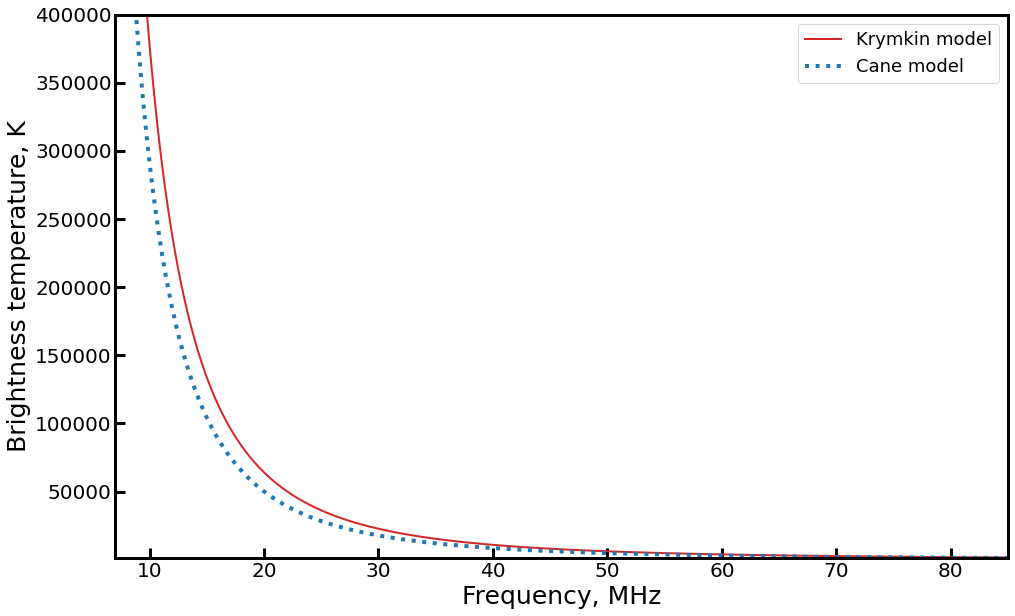

In [18]:
plt.figure(facecolor = 'white', figsize = (16, 10))
ax = plt.subplot(111)

plt.plot(freq, Tbg_Krymkin, color = 'C3', label = 'Krymkin model', lw = 2)
plt.plot(freq, Tbg_Cane, color = 'C0', label = 'Cane model', lw = 4, linestyle = ':')

plt.legend(loc = 'upper right', fontsize = 18)
for axis in ['top','bottom','left','right']:
  ax.spines[axis].set_linewidth(3.0)
ax.xaxis.set_tick_params(width=3, which='both', direction='in', length=10, labelsize = 20)
ax.yaxis.set_tick_params(width=3, which='major', direction='in', length=10, labelsize = 20)
ax.yaxis.set_tick_params(width=3, which='minor', direction='in', length=7, labelsize = 20)
plt.xlabel('Frequency, MHz', fontsize=25)
plt.ylabel('Brightness temperature, K', fontsize=25)
plt.axis([7, 85, 1000,  400000])

(5.0, 100.0, 1000.0, 10000000.0)

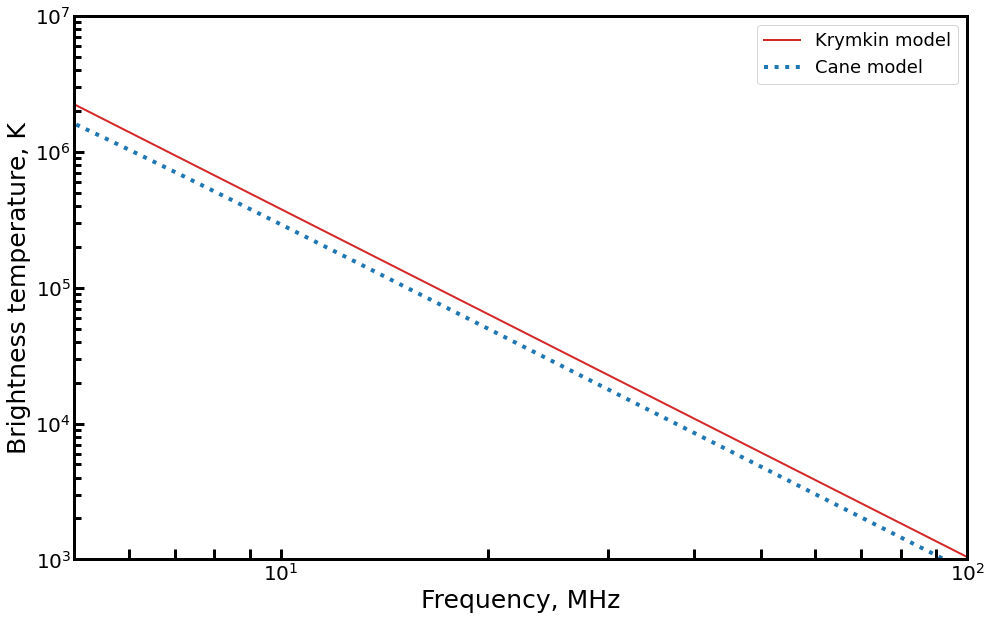

In [19]:
plt.figure(facecolor = 'white', figsize = (16, 10))
ax = plt.subplot(111)

plt.loglog(freq, Tbg_Krymkin, color = 'C3', label = 'Krymkin model', lw = 2)
plt.loglog(freq, Tbg_Cane, color = 'C0', label = 'Cane model', lw = 4, linestyle = ':')

plt.legend(loc = 'upper right', fontsize = 18)
for axis in ['top','bottom','left','right']:
  ax.spines[axis].set_linewidth(3.0)
ax.xaxis.set_tick_params(width=3, which='both', direction='in', length=10, labelsize = 20)
ax.yaxis.set_tick_params(width=3, which='major', direction='in', length=10, labelsize = 20)
ax.yaxis.set_tick_params(width=3, which='minor', direction='in', length=7, labelsize = 20)
plt.xlabel('Frequency, MHz', fontsize=25)
plt.ylabel('Brightness temperature, K', fontsize=25)
plt.axis([5, 100, 1000,  10000000])

In [24]:
freq[2]

1.1981981981981982